# Netflix Titles- Assignment 1

# This notebook investigates which countries contribute the most titles and how that has changed over time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv("../netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Dictionary  
show_id: movie ID number
type: movie or TV show
title: title of the media
director: maker of the media 
cast: actors in the portrayed media
country: location of film 
date_added: date added to the dataset
release_year: year the media was released
rating: rating of the content e.g. PG-13, R
duration: length of the media
listed_in: genre of media
description: short summary of the media 

In [ ]:
# Cleaning

# Drop duplicates and check for missing values
df = df.drop_duplicates()
df.isnull().sum()

# Drop rows with missing countries and clean white space
df = df.dropna(subset=["country"])
df["country"] = df["country"].str.strip()


In [11]:
# My function: creates different "eras" for movies to further classify them
def create_movie_eras(year):
    if year < 1960:
        return "Vintage"
    elif 1960 <= year < 2000:
        return "Classic"
    elif 2000 <= year < 2010:
        return "Modern"
    else:
        return "Contemporary"
    
df["movie_era"] = df["release_year"].apply(create_movie_eras)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_era
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2021.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Contemporary
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Contemporary
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Contemporary
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,2021.0,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Contemporary
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021.0,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Contemporary


In [15]:
# Clean country column for analysis so I can use it for grouping 

def top_country(country):
    if pd.isna(country):
        return None
    return country.split(",")[0].strip()

df["top_country"] = df["country"].apply(top_country)

In [18]:
# Analysis feature 1: grouped summary, showing the top countries 

top_country_counts = df["top_country"].value_counts().head(10)
top_country_counts

top_country
United States     3211
India             1008
United Kingdom     628
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
Mexico             134
Australia          117
Name: count, dtype: int64

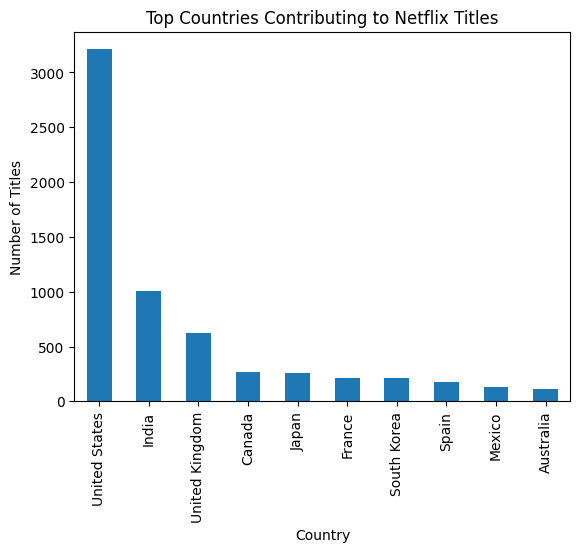

In [ ]:
# Visual representation 1: Bar chart of top countries 

plt.figure()
top_country_counts.plot(kind="bar")
plt.title("Top Countries Contributing to Netflix Titles")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()